In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assignment 2 - Regression
### Predict the TOTAL COMPENSATION for this year. 


In [2]:
#Load Data
df = pd.read_csv("data/Euro_Salary.csv")
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Timestamp,1253,1248,24/11/2020 13:55:19,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1226.0,NaN,NaN,NaN,32.509788,5.663804,20.0,29.0,32.0,35.0,69.0
Gender,1243,3,Male,1049,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,1253,119,Berlin,681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Position,1247,148,Software Engineer,387,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total years of experience,1237,48,10,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Years of experience in Germany,1221,53,2,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seniority level,1241,24,Senior,565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Your main technology / programming language,1126,256,Java,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Other technologies/programming languages you use often,1096,562,Javascript / Typescript,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#df[393:396]

In [4]:
#df.info()
#df["Other technologies/programming languages you use often"].value_counts()

In [5]:
#df.sample(20)

## Cleaning

In [6]:
df

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000,30,Full-time employee,Unlimited contract,English,51-100,Product
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,80000.0,NaN,28,Full-time employee,Unlimited contract,English,101-1000,Product
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,54000.0,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,18/01/2021 15:05:50,31.0,Male,Berlin,Backend Developer,9,5,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",70000.0,72000,26,Full-time employee,Unlimited contract,English,51-100,Product
1249,18/01/2021 17:46:02,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10,1.5,Senior,consumer analysis,NaN,60000.0,3000,unlimited,Full-time employee,Unlimited contract,English,1000+,Product
1250,18/01/2021 23:20:35,39.0,Male,Munich,IT Operations Manager,15,2,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",110000.0,0,28,Full-time employee,Unlimited contract,English,101-1000,eCommerce
1251,19/01/2021 10:17:58,26.0,Male,Saarbrücken,Frontend Developer,7,7,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",38350.0,40950,27,Full-time employee,Unlimited contract,German,101-1000,Product


In [7]:
#First thing to do is to drop the duplicates

df.drop_duplicates(inplace= True)

#df

In [8]:
#at a glance I feel like we dont need the timestamp column

df.drop(columns = "Timestamp", inplace= True)

#df.head()


In [9]:
#need to change the name of some columns to make it easier later

df = df.rename(columns={"Position ": "Position"})
df = df.rename(columns={"Сontract duration": "Contract duration"})

In [10]:
#Also according to the sample_exploration notebook, I will try dropping the programming languages and vaction days columns 

df.drop(columns = ["Your main technology / programming language", "Other technologies/programming languages you use often", "Number of vacation days"], inplace= True)

#df.head()


In [11]:
#should probably fill the null values in both salary columns with 0 for now

df[["Yearly brutto salary (without bonus and stocks) in EUR", "Yearly bonus + stocks in EUR"]] = df[["Yearly brutto salary (without bonus and stocks) in EUR", "Yearly bonus + stocks in EUR"]].fillna(0)

#df

In [12]:
# Going to establish the Target, which will be the sum of both salaries. (used code from sample exploration to save time)

df["Bonus"] = pd.to_numeric(df["Yearly bonus + stocks in EUR"], downcast="float", errors="coerce")
df["target"] = df["Yearly brutto salary (without bonus and stocks) in EUR"] + df["Bonus"]
df.drop(columns={"Yearly brutto salary (without bonus and stocks) in EUR", "Yearly bonus + stocks in EUR", "Bonus"}, inplace=True)

#df.head()

In [13]:
#going to clean up the years of experience column

df["Total years of experience"] = df["Total years of experience"].replace(regex=',', value='.')
df.drop(columns= "Years of experience in Germany", inplace= True)
df.loc[805, "Total years of experience"] = 11
df.loc[855, "Total years of experience"] = 15
df.loc[1209, "Total years of experience"] = 0
df.loc[1089, "Total years of experience"] = 0

df["Total years of experience"] = df["Total years of experience"].astype(float)


In [14]:
#eliminating rows that dont belong

df = df[(df["target"] != 0) & (df["target"] <= 1000000)]
df = df[(df["Total years of experience"] <= 40)]
df = df[(df["Gender"] != "Diverse")]
df = df[(df["Contract duration"] != "0")]
df = df.dropna()
#df

In [15]:
#Getting rid of low value counts and putting them in "other category" (using code from the sample_exploration notebook)

def replace_low_freq(d, col, threshold=10, replacement='other'):
    value_counts = d[col].value_counts() # Specific column 
    to_remove = value_counts[value_counts <= threshold].index
    tmp = d[col].replace(to_replace=to_remove, value=replacement)
    return tmp



In [16]:
#putting all low frequency values into other

df["City"] = replace_low_freq(df, "City", 10, "Other")

#df["City"].value_counts()

In [17]:
df["Position"] = replace_low_freq(df, "Position", 5, "Other")

#df["Position"].value_counts()

In [18]:
df["Seniority level"] = replace_low_freq(df, "Seniority level", 5, "Other")

#df["Seniority level"].value_counts()

In [19]:
df["Main language at work"] = replace_low_freq(df, "Main language at work", 5, "Other")

#df["Main language at work"].value_counts()

In [20]:
#putting age and experience values into ranges to make things a little simpler

Agebins = [0, 18, 30, 40, 50, float("inf")]
Agelabels = ["0-18", "19-30", "31-40", "41-50", "51+"]

Experiencebins = [0, 5, 10, 15, 20, 25, 30, float("inf")]
Experiencelabels = ["0-5", "6-10", "11-15", "16-20", "21-25", "26-30", "31+"]

In [21]:
df["Age"] = pd.cut(df["Age"], bins=Agebins, labels=Agelabels, right=False)
df["Total years of experience"] = pd.cut(df["Total years of experience"], bins=Experiencebins, labels=Experiencelabels, right=False)

df

,Age,Gender,City,Position,Total years of experience,Seniority level,Employment status,Contract duration,Main language at work,Company size,Company type,target
0,19-30,Male,Munich,Software Engineer,6-10,Senior,Full-time employee,Unlimited contract,English,51-100,Product,85000.0
1,19-30,Male,Berlin,Backend Developer,6-10,Senior,Full-time employee,Unlimited contract,English,101-1000,Product,80000.0
2,19-30,Male,Berlin,Software Engineer,11-15,Lead,Self-employed (freelancer),Temporary contract,English,101-1000,Product,240000.0
3,19-30,Male,Berlin,Frontend Developer,0-5,Junior,Full-time employee,Unlimited contract,English,51-100,Startup,54000.0
4,31-40,Male,Berlin,Backend Developer,16-20,Senior,Full-time employee,Unlimited contract,English,101-1000,Product,62000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1248,31-40,Male,Berlin,Backend Developer,6-10,Senior,Full-time employee,Unlimited contract,English,51-100,Product,142000.0
1249,31-40,Male,Berlin,Other,11-15,Senior,Full-time employee,Unlimited contract,English,1000+,Product,63000.0
1250,31-40,Male,Munich,Other,16-20,Lead,Full-time employee,Unlimited contract,English,101-1000,eCommerce,110000.0
1251,19-30,Male,Other,Frontend Developer,6-10,Middle,Full-time employee,Unlimited contract,German,101-1000,Product,79300.0


In [22]:
# a lot of columns don't contain numbers, so I am converting these values into number for the ML model

columns = ["Age", "Total years of experience", "Gender", "City", "Position", "Seniority level","Employment status", "Contract duration", "Main language at work", "Company size", "Company type"]

In [23]:
label_encoder = LabelEncoder()

In [24]:
for column in columns:
    df[column] = label_encoder.fit_transform(df[column])

df

,Age,Gender,City,Position,Total years of experience,Seniority level,Employment status,Contract duration,Main language at work,Company size,Company type,target
0,0,1,4,13,6,5,1,1,0,3,41,85000.0
1,0,1,0,0,6,5,1,1,0,1,41,80000.0
2,0,1,0,13,1,2,5,0,0,1,41,240000.0
3,0,1,0,7,0,1,1,1,0,3,50,54000.0
4,1,1,0,0,2,5,1,1,0,1,41,62000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1248,1,1,0,0,6,5,1,1,0,3,41,142000.0
1249,1,1,0,10,1,5,1,1,0,0,41,63000.0
1250,1,1,4,10,2,2,1,1,0,1,59,110000.0
1251,0,1,5,7,6,3,1,1,1,1,41,79300.0


## Regression model

In [25]:
#Identifying X and y

X = df.drop(["target"], axis= 1)

y = df["target"]

In [26]:
#assigning the X/y split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=20)


In [27]:
#making a linear regression model

lr = LinearRegression()

In [28]:
lr.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = lr.predict(X_test)

In [30]:
r2 = r2_score(y_test, y_pred)
mean_square = mean_squared_error(y_test, y_pred)
mean_absolute = mean_absolute_error(y_test, y_pred)
intercept = lr.intercept_

print(r2)
print(mean_absolute)
print(mean_square)
print(intercept)

0.03790175787963035
28461.098767600255
3950064545.9936557
49592.79371921126


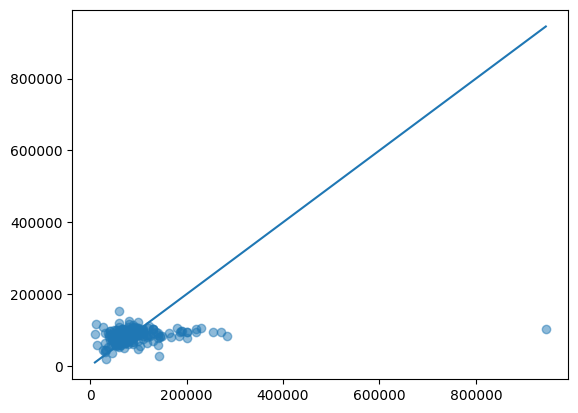

In [31]:
plt.scatter(y_test, y_pred, alpha= 0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()])


# Answers and Explainations
(Expand/modify as needed)

### Results
I do not think I got anywhere close to what I was supposed to get
### Feature Selection Activities

### Hyperparameter Changes
 